In [40]:
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from keras.models import save_model

# Abordagem 2: extração de características



## Extrator de características

In [13]:
diretorio = './homer_bart_1'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]

print(arquivos)

['./homer_bart_1\\bart1.bmp', './homer_bart_1\\bart10.bmp', './homer_bart_1\\bart100.bmp', './homer_bart_1\\bart101.bmp', './homer_bart_1\\bart102.bmp', './homer_bart_1\\bart103.bmp', './homer_bart_1\\bart104.bmp', './homer_bart_1\\bart105.bmp', './homer_bart_1\\bart106.bmp', './homer_bart_1\\bart108.bmp', './homer_bart_1\\bart109.bmp', './homer_bart_1\\bart11.bmp', './homer_bart_1\\bart110.bmp', './homer_bart_1\\bart111.bmp', './homer_bart_1\\bart112.bmp', './homer_bart_1\\bart113.bmp', './homer_bart_1\\bart114.bmp', './homer_bart_1\\bart115.bmp', './homer_bart_1\\bart116.bmp', './homer_bart_1\\bart117.bmp', './homer_bart_1\\bart118.bmp', './homer_bart_1\\bart119.bmp', './homer_bart_1\\bart12.bmp', './homer_bart_1\\bart120.bmp', './homer_bart_1\\bart121.bmp', './homer_bart_1\\bart122.bmp', './homer_bart_1\\bart123.bmp', './homer_bart_1\\bart124.bmp', './homer_bart_1\\bart125.bmp', './homer_bart_1\\bart126.bmp', './homer_bart_1\\bart127.bmp', './homer_bart_1\\bart128.bmp', './homer_bar

In [4]:
mostrar_imagens = False
caracteristicas = []
dados_para_dataframe = []

for imagen_caminhos in arquivos:
    # print(imagen_caminhos)
    try:
        imagem_original = cv2.imread(imagen_caminhos)
        (H, W) = imagem_original.shape[:2]
    except:
        continue

    imagem_alterada = imagem_original.copy()
    imagem_caracteristicas = []
    imagem_nome = os.path.basename(os.path.normpath(imagen_caminhos))
    boca = calca = sapatos = camisa = calcao = tenis = 0
    classe = 0 if imagem_nome.startswith('b') else 1

    for altura in range(0, H):
        for largura in range(0, W):
            # RGB -> BGR
            azul = imagem_alterada[altura, largura, 0]
            verde = imagem_alterada[altura, largura, 1]
            vermelho = imagem_alterada[altura, largura, 2]

            # Homer - marrom da boca
            if (azul >= 95 and azul <= 140 and verde >= 160 and verde <= 185 and vermelho >= 175 and vermelho <= 210):
                imagem_alterada[altura, largura] = [0, 255, 255]
                boca += 1

            # Homer - azul da calca
            if (azul >= 150 and azul <= 180 and verde >= 98 and verde <= 120 and vermelho >= 0 and vermelho <= 90):
                imagem_alterada[altura, largura] = [0, 255, 255]
                calca += 1

            # Homer - cinza do sapato
            if altura > (H / 2):
                if (azul >= 25 and azul <= 45 and verde >= 25 and verde <= 45 and vermelho >= 25 and vermelho <= 45):
                    imagem_alterada[altura, largura] = [0, 255, 255]
                    sapatos += 1

            # Bart - laranja da camisa
            if (azul >= 11 and azul <= 22 and verde >= 85 and verde <= 105 and vermelho >= 240 and vermelho <= 255):
                imagem_alterada[altura, largura] = [0, 255, 128]
                camisa += 1

            # Bart - azul do calção
            if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
                imagem_alterada[altura, largura] = [0, 255, 128]
                calcao += 1

            # Bart - azul do tênis
            if altura > (H / 2):
                if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
                    imagem_alterada[altura, largura] = [0, 255, 128]
                    tenis += 1

    boca = round((boca / (H * W)) * 100, 9)
    calca = round((calca / (H * W)) * 100, 9)
    sapatos = round((sapatos / (H * W)) * 100, 9)
    camisa = round((camisa / (H * W)) * 100, 9)
    calcao = round((calcao / (H * W)) * 100, 9)
    tenis = round((tenis / (H * W)) * 100, 9)

    dados_para_dataframe.append([boca, calca, sapatos, camisa, calcao, tenis, classe])
    caracteristicas.append(imagem_caracteristicas)

    if mostrar_imagens:
        print(
            f'Homer boca: {imagem_caracteristicas[0]} Homer calca: {imagem_caracteristicas[1]} Homer sapato: {imagem_caracteristicas[1]} Bart camisa: {camisa} Bart calção: {calcao} Bart tênis: {tenis} Nome imagem: {imagem_nome}')
        imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
        imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
        figura, im = plt.subplots(1, 2)
        im[0].imshow(imagem_original)
        im[0].axis('off')
        im[1].imshow(imagem_alterada)
        im[1].axis('off')
        plt.show()

    # print(boca)
    # print(imagem_nome)
    # plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)) # cmap='gray' se for preto e branco
    # plt.axis('off') # Remove os eixos com números
    # plt.show()
    # print(H, W)

# --- CRIAÇÃO DO DATAFRAME FORA DO LOOP ---
colunas = ['boca', 'calca', 'sapatos', 'camisa', 'calcao', 'tenis', 'classe']
dataset = pd.DataFrame(dados_para_dataframe, columns=colunas)
dataset.to_csv('features.csv', index=False)

In [5]:
dataset = pd.read_csv('features.csv')
dataset

,boca,calca,sapatos,camisa,calcao,tenis,classe
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.518955,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


In [6]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [7]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X_treinamento.shape, y_treinamento.shape

((215, 6), (215,))

In [9]:
X_teste.shape, y_teste.shape

((54, 6), (54,))

In [10]:
input_dim = X_treinamento.shape[1]
network2 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ]
)

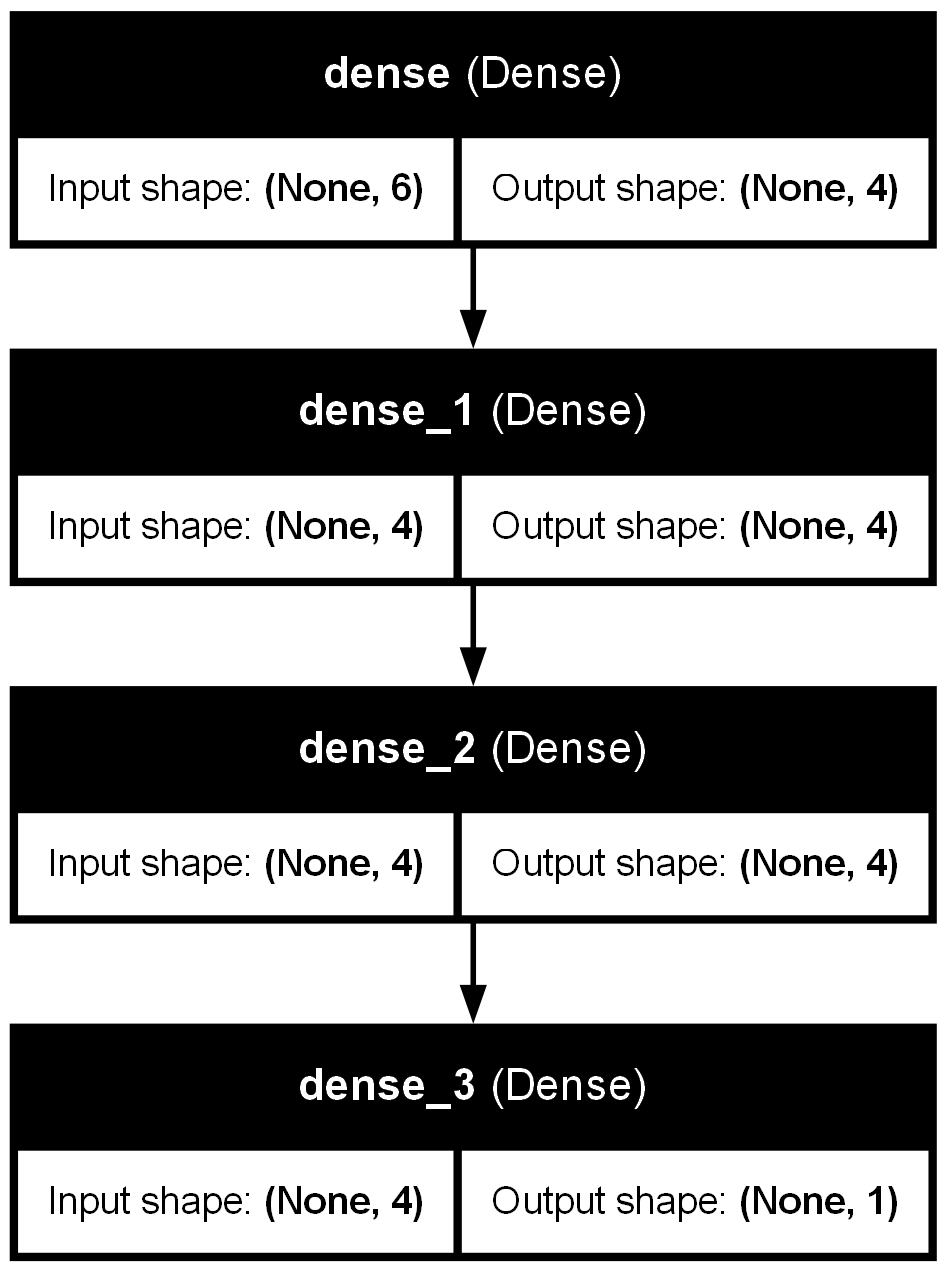

In [14]:
plot_model(network2, show_shapes=True, show_layer_names=True, to_file='modelo.png')
Image('modelo.png')

In [15]:
network2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
historico = network2.fit(X_treinamento, y_treinamento, batch_size=32, epochs=500, verbose=0)

## Avaliação da Rede Neural

In [22]:
historico.history.keys()

dict_keys(['accuracy', 'loss'])

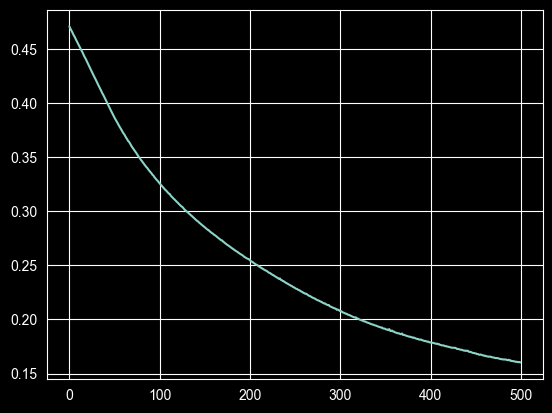

In [23]:
plt.plot(historico.history['loss'])

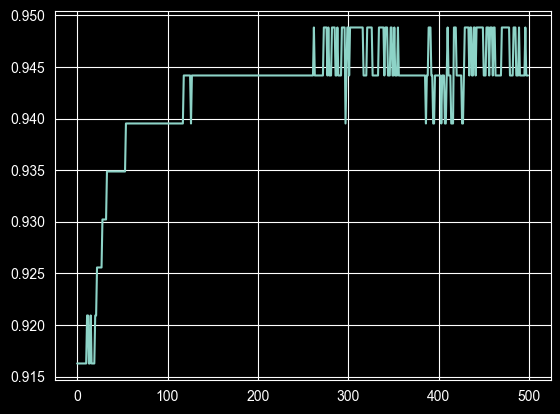

In [24]:
plt.plot(historico.history['accuracy'])

In [25]:
previsoes = network2(X_teste)
previsoes

<tf.Tensor: shape=(54, 1), dtype=float32, numpy=
array([[0.07323939],
       [0.9999977 ],
       [0.07323939],
       [0.23109101],
       [0.07323939],
       [0.99999994],
       [0.09688516],
       [0.07323939],
       [0.07323939],
       [0.07323939],
       [0.07323939],
       [1.        ],
       [0.9882863 ],
       [0.07323939],
       [0.24807906],
       [1.        ],
       [0.9010701 ],
       [0.9999956 ],
       [0.15248075],
       [0.07323939],
       [0.07323939],
       [0.99999994],
       [0.9267081 ],
       [0.07323939],
       [0.07323939],
       [1.        ],
       [0.16711101],
       [0.07323939],
       [0.9994576 ],
       [1.        ],
       [0.9735841 ],
       [1.        ],
       [1.        ],
       [0.23206243],
       [1.        ],
       [0.9666002 ],
       [0.07323939],
       [0.07323939],
       [0.24038452],
       [0.07323939],
       [0.99473995],
       [0.25942984],
       [0.07323939],
       [0.07323939],
       [0.07323939],
      

In [26]:
previsoes = previsoes > 0.5
previsoes

<tf.Tensor: shape=(54, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])>

In [27]:
y_teste

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [30]:
accuracy_score(y_teste, previsoes)

0.9259259259259259

In [32]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[27,  1],
       [ 3, 23]])

<Axes: >

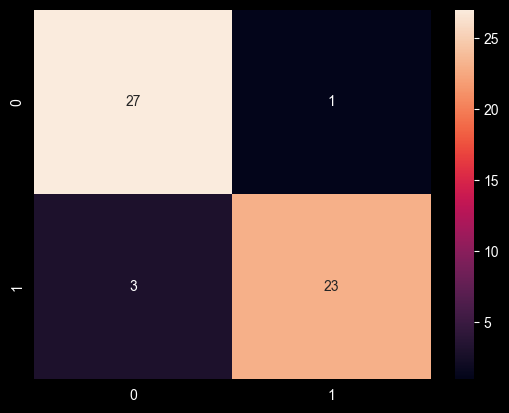

In [34]:
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.96      0.88      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



## Salvar, carregar e classificar uma única imagem

In [39]:
model_json = network2.to_json()
with open("network2.json", "w") as json_file:
    json_file.write(model_json)

In [42]:
network2.save('network2.keras')

In [44]:
network_loaded = tf.keras.models.load_model('network2.keras')
network_loaded.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

C:\Users\soste\AppData\Local\pypoetry\Cache\virtualenvs\curso-4-1-visao-computacional-guia-complet-w7ZThdhu-py3.12\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [45]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
imagem_teste = X_teste[0]
imagem_teste

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       5.59913859e+00, 5.59913859e+00])

In [47]:
imagem_teste.shape

(6,)

In [48]:
imagem_teste = imagem_teste.reshape(1, -1)
imagem_teste.shape

(1, 6)

In [49]:
network_loaded.predict(imagem_teste)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


np.float32(0.07323941)

In [51]:
if network_loaded.predict(imagem_teste)[0][0] < 0.5:
    print('Bart')
else:
    print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Bart
